# Liner Regression
### Data File: inc_exp_data.csv
#### The file contains data about Households, their Income & Expenses

## Attributes
#### 1: Mthly_HH_Income: Monthly Household Income
#### 2: Mthly_HH_Expense: Monthly Household Expense
#### 3: No_of_Fly_Members: No of Family Members
#### 4: Emi_or_Rent_Amt: Monthly EMI or Rent Expense 
#### 5: Annual_HH_Income: Annual Household Income
#### 6: Highest_Qualified_Member: Qualification of Highest Qualified Member in the Family
#### 7: No_of_Earning_Members: Number of Earning Members in the Household

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
## Set the working directory and import data
os.chdir("D:/K2Analytics/datafile")
inc_exp = pd.read_csv("Inc_Exp_Data.csv")
inc_exp.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# Simple Linear Regression

In [3]:
X = inc_exp[['Mthly_HH_Income']]
y = inc_exp['Mthly_HH_Expense']

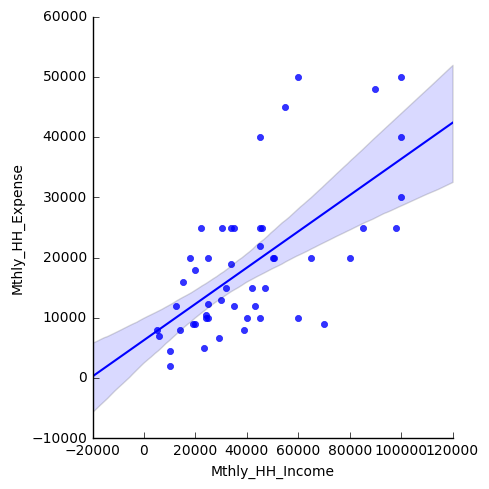

In [5]:
## Scatter Plot
import seaborn as sns
sns.lmplot(x ="Mthly_HH_Income", 
           y = "Mthly_HH_Expense", data = inc_exp)

In [6]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [7]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Train R^2
print(regression_model.score(X_train, y_train))

0.466521354803


In [9]:
# Test R^2
print(regression_model.score(X_test, y_test))

0.339788593265


# K Fold Cross-Validation

In [10]:
# Evaluate using Cross Validation
from sklearn import model_selection

In [11]:
seed = 1
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=2)

In [12]:
model = LinearRegression()

In [18]:
results = model_selection.cross_val_score(model, X_train, y_train, scoring='r2', cv=kfold)


print("Cross Validation Test R Squared  "  )
print((results[0:2]))
print("*****************")
print("R Squared: %.3f " % (results.mean()))

Cross Validation Test R Squared  
[ 0.43684339  0.2461775 ]
*****************
R Squared: 0.342 


In [27]:
# Test R^2
model.fit( X_train, y_train)
print(model.score(X_test, y_test))

0.339788593265
